In [1]:
#import required libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


In [2]:
Train_df = pd.read_csv('World Happiness Report.csv')
Train_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
Train_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
Train_df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
clean_train_df = Train_df[Train_df.Freedom>0]

In [6]:
clean_train_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
clean_train_df.shape

(157, 12)

In [8]:
clean_train_df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [9]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Standard Error                 157 non-null    float64
 5   Economy (GDP per Capita)       157 non-null    float64
 6   Family                         157 non-null    float64
 7   Health (Life Expectancy)       157 non-null    float64
 8   Freedom                        157 non-null    float64
 9   Trust (Government Corruption)  157 non-null    float64
 10  Generosity                     157 non-null    float64
 11  Dystopia Residual              157 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
clean_train_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,79.286624,5.380185,0.047856,0.845250,0.992142,0.630437,0.431345,0.143457,0.237665,2.099904
std,45.826463,1.147302,0.017197,0.404256,0.272891,0.247858,0.147203,0.120417,0.127005,0.555198
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.076990,0.000000,0.000000,0.328580
25%,40.000000,4.518000,0.037260,0.545580,0.860400,0.438730,0.328780,0.061460,0.149820,1.758730
50%,79.000000,5.253000,0.043940,0.901980,1.032760,0.697020,0.436260,0.107130,0.216840,2.100170
75%,119.000000,6.269000,0.052240,1.159910,1.216240,0.811600,0.550110,0.180600,0.311050,2.465310
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [11]:
print('World Happiness Report Skewness:', clean_train_df.skew())

World Happiness Report Skewness: Happiness Rank                   0.011831
Happiness Score                  0.087494
Standard Error                   1.983427
Economy (GDP per Capita)        -0.310546
Family                          -1.018211
Health (Life Expectancy)        -0.705391
Freedom                         -0.342527
Trust (Government Corruption)    1.380294
Generosity                       0.992638
Dystopia Residual               -0.243286
dtype: float64


Text(0.5, 1.0, 'Histogram for Happiness Scores')

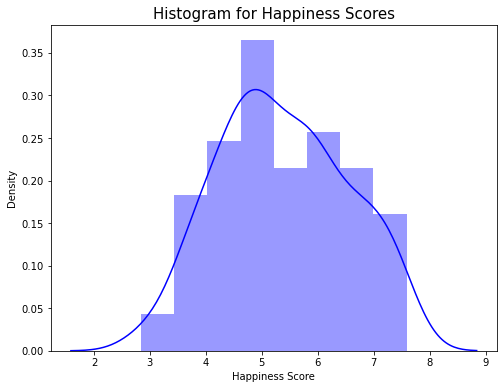

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(clean_train_df['Happiness Score'],kde = True , color ='blue')
plt.title('Histogram for Happiness Scores', fontsize=15)

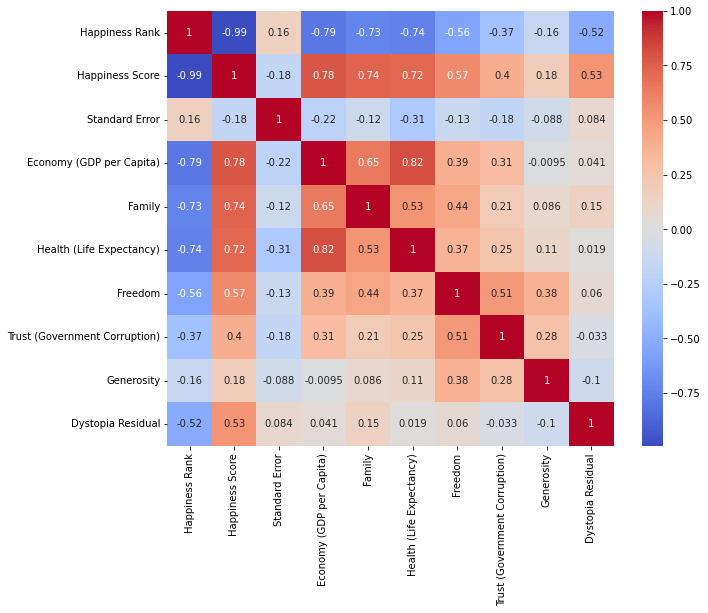

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(clean_train_df.corr(), cmap='coolwarm', annot=True);

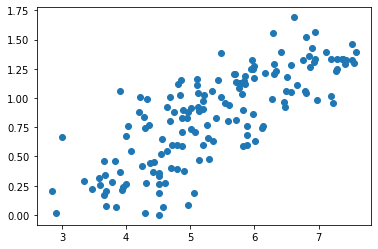

In [14]:
plt.scatter(clean_train_df['Happiness Score'], clean_train_df['Economy (GDP per Capita)'])

In [15]:
clean_train_df = clean_train_df.drop(['Country','Region','Happiness Rank','Standard Error','Trust (Government Corruption)'], axis=1)

In [16]:
clean_train_df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,1.83302


In [17]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Happiness Score           157 non-null    float64
 1   Economy (GDP per Capita)  157 non-null    float64
 2   Family                    157 non-null    float64
 3   Health (Life Expectancy)  157 non-null    float64
 4   Freedom                   157 non-null    float64
 5   Generosity                157 non-null    float64
 6   Dystopia Residual         157 non-null    float64
dtypes: float64(7)
memory usage: 9.8 KB


In [18]:
data=clean_train_df

In [19]:
x = data.drop('Happiness Score',axis=1)
y = data['Happiness Score']

In [20]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x,y,random_state=0,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((125, 6), (32, 6), (125,), (32,))

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test , Y_test)

0.986348748603421

In [22]:
y_pred = lr.predict(X_test)

In [23]:
y_pred

array([7.18325509, 6.07357058, 4.73783707, 4.55465219, 5.79650592,
       4.57788051, 4.46590049, 5.35255204, 4.67057316, 4.97277685,
       6.87586741, 3.77149751, 6.70899184, 5.8843917 , 4.79186577,
       3.92976671, 4.01847424, 4.92976204, 3.97699728, 5.77593931,
       5.95142074, 6.66373776, 5.92320455, 7.11768762, 6.40287579,
       6.3812946 , 4.99009764, 6.78245298, 5.16075447, 4.70165362,
       5.95086668, 6.02001415])

In [24]:
Y_test

7      7.364
44     5.995
113    4.633
120    4.514
63     5.716
114    4.610
121    4.512
71     5.474
108    4.694
95     4.949
24     6.786
147    3.678
26     6.670
60     5.770
109    4.686
142    3.896
129    4.297
97     4.885
140    3.931
56     5.828
45     5.987
33     6.455
59     5.791
8      7.286
40     6.168
37     6.298
100    4.867
19     6.901
86     5.123
112    4.642
51     5.889
54     5.848
Name: Happiness Score, dtype: float64